In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Train.csv")
df.columns =['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine_Type',
       'Registration', 'Year', 'Model']
df.isna().sum()


Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine_Type       0
Registration      0
Year              0
Model             0
dtype: int64

# Price and Brand

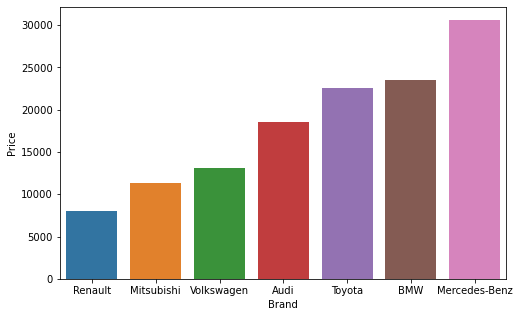

In [3]:
tmp = df.groupby('Brand').Price.mean().sort_values().reset_index()
plt.figure(figsize = (8,5))
sns.barplot(x= tmp.Brand,y = tmp.Price)
plt.show()

# Price and Body

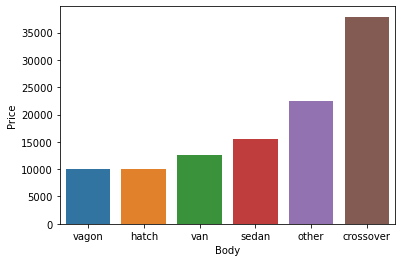

In [4]:
tmp = df.groupby(df.Body).Price.mean().sort_values().reset_index()
sns.barplot(x = tmp.Body,y=tmp.Price)
plt.show()

In [5]:
df.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine_Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

# Price and Mileage

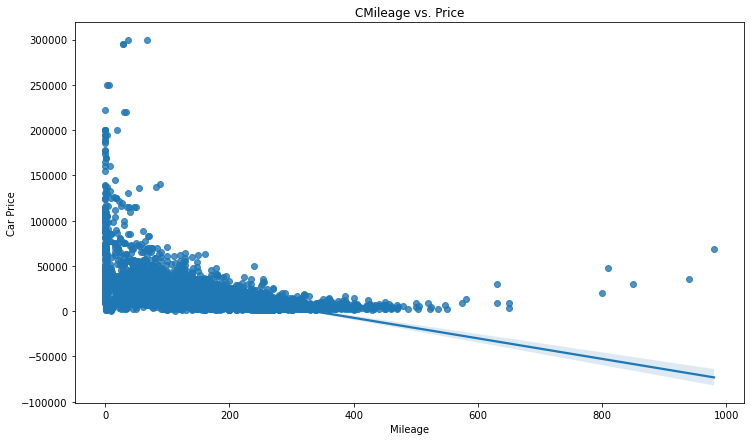

In [6]:
plt.figure(figsize = (12,7))
sns.regplot(x = df.Mileage,y = df.Price).set(xlabel='Mileage', ylabel='Car Price', title='CMileage vs. Price')
plt.show()

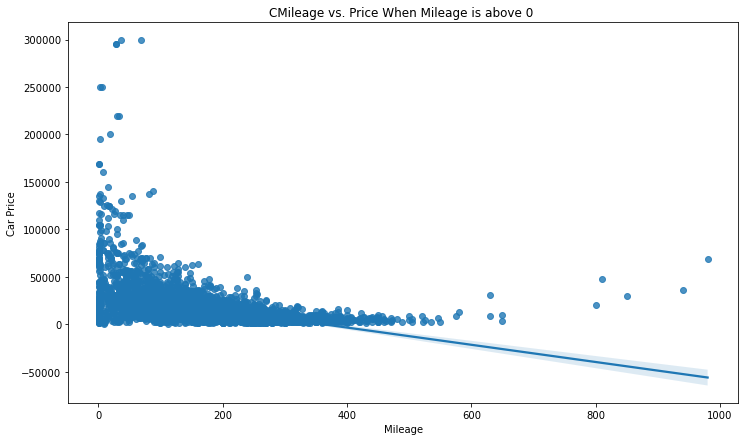

In [7]:
plt.figure(figsize = (12,7))
tmp = df[df.Mileage != 0]
sns.regplot(x = tmp.Mileage,y = tmp.Price).set(xlabel='Mileage', ylabel='Car Price', title='CMileage vs. Price When Mileage is above 0 ')
plt.show()

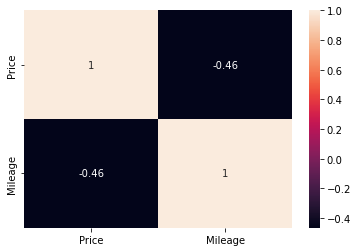

In [8]:
sns.heatmap(df[['Price','Mileage']].corr(),annot =True)
plt.show()

# Price and EngineV

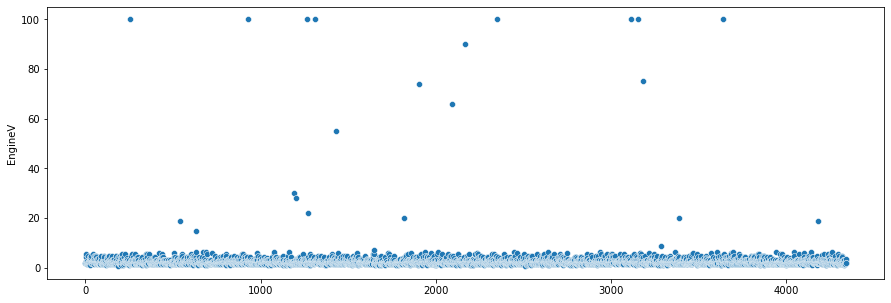

In [9]:
plt.figure(figsize = (15,5))
sns.scatterplot(x = np.arange(0,len(df)), y = df.EngineV)
plt.show()

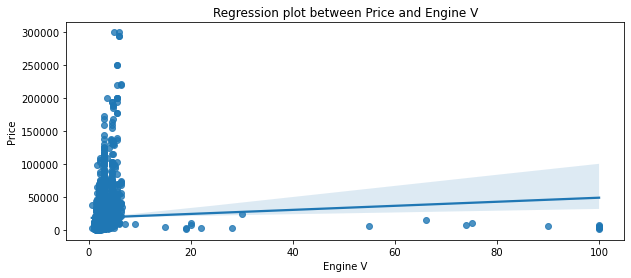

In [10]:
plt.figure(figsize = (10,4))
sns.regplot(x = df.EngineV,y = df.Price).set(xlabel='Engine V',title = "Regression plot between Price and Engine V")
plt.show()

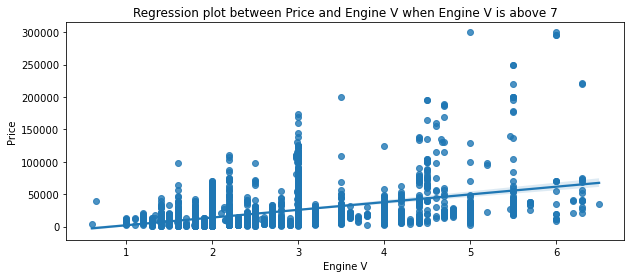

In [11]:
plt.figure(figsize = (10,4))
tmp = df[df.EngineV<7]
sns.regplot(x = tmp.EngineV,y = tmp.Price).set(xlabel='Engine V',title =
                                               "Regression plot between Price and Engine V when Engine V is above 7")
plt.show()

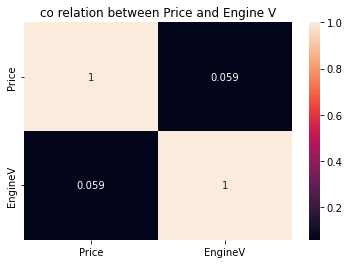

In [12]:
sns.heatmap(df[['Price','EngineV']].corr(),annot = True).set(title = 'co relation between Price and Engine V')
plt.show()

In [13]:
df.EngineV.value_counts()

2.00     709
3.00     549
2.50     350
1.60     318
2.20     294
        ... 
30.00      1
15.00      1
1.79       1
0.65       1
6.50       1
Name: EngineV, Length: 73, dtype: int64

In [14]:
df.EngineV.describe()

count    4195.000000
mean        2.790734
std         5.066437
min         0.600000
25%         1.800000
50%         2.200000
75%         3.000000
max        99.990000
Name: EngineV, dtype: float64

# Price and Engine_Type

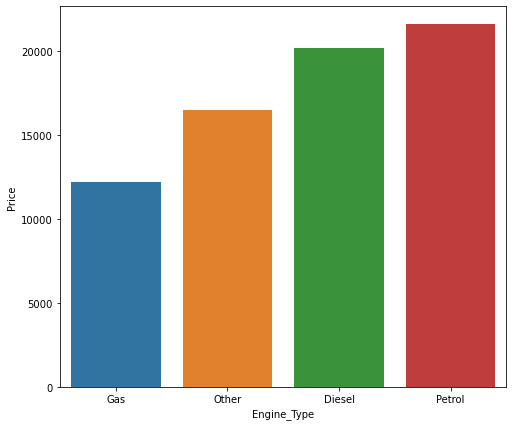

In [15]:
tmp = df.groupby('Engine_Type').Price.mean().sort_values().reset_index()
plt.figure(figsize=(8,7))
sns.barplot(x = tmp.Engine_Type,y = tmp.Price)
plt.show()

# Registration and Price 

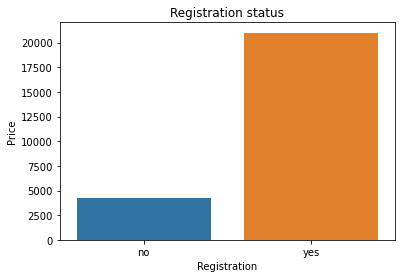

In [16]:
tmp = df.groupby(df.Registration).Price.mean().sort_values().reset_index()
sns.barplot(x=tmp.Registration,y=tmp.Price).set(title='Registration status')
plt.show()

# Year and Price

In [17]:
tmp = df.groupby('Year').Price.mean().sort_index().reset_index()

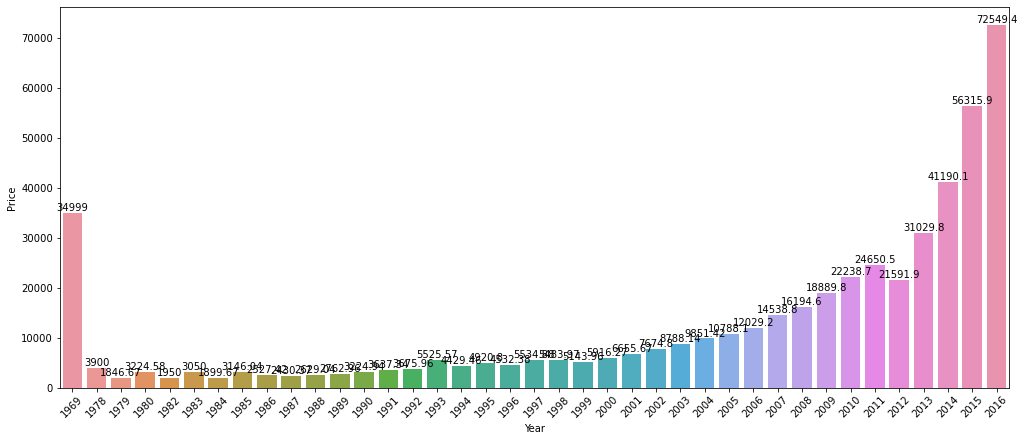

In [18]:
plt.figure(figsize=(17,7))
ax = sns.barplot(x = tmp.Year,y = tmp.Price)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Price'>

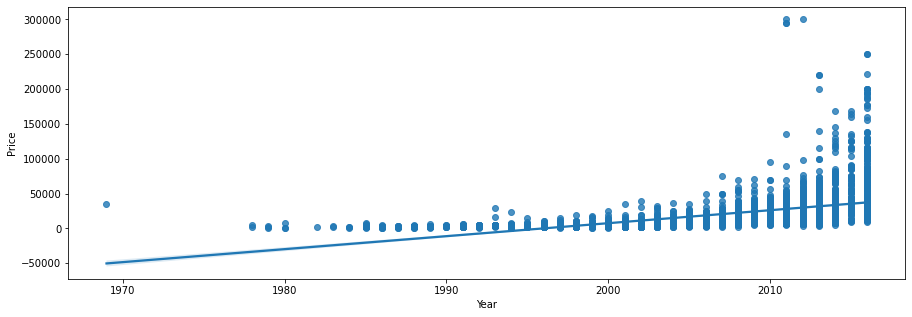

In [19]:
plt.figure(figsize = (15,5))
sns.regplot(x = df.Year,y =df.Price )

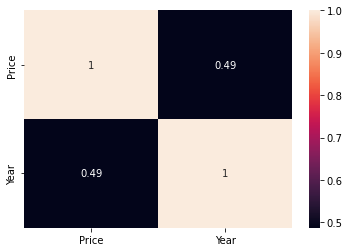

In [20]:
sns.heatmap(df[['Price','Year']].corr(),annot = True)
plt.show()

# Model and Price

In [21]:
tmp = df.groupby('Model').Price.mean().sort_values().reset_index()

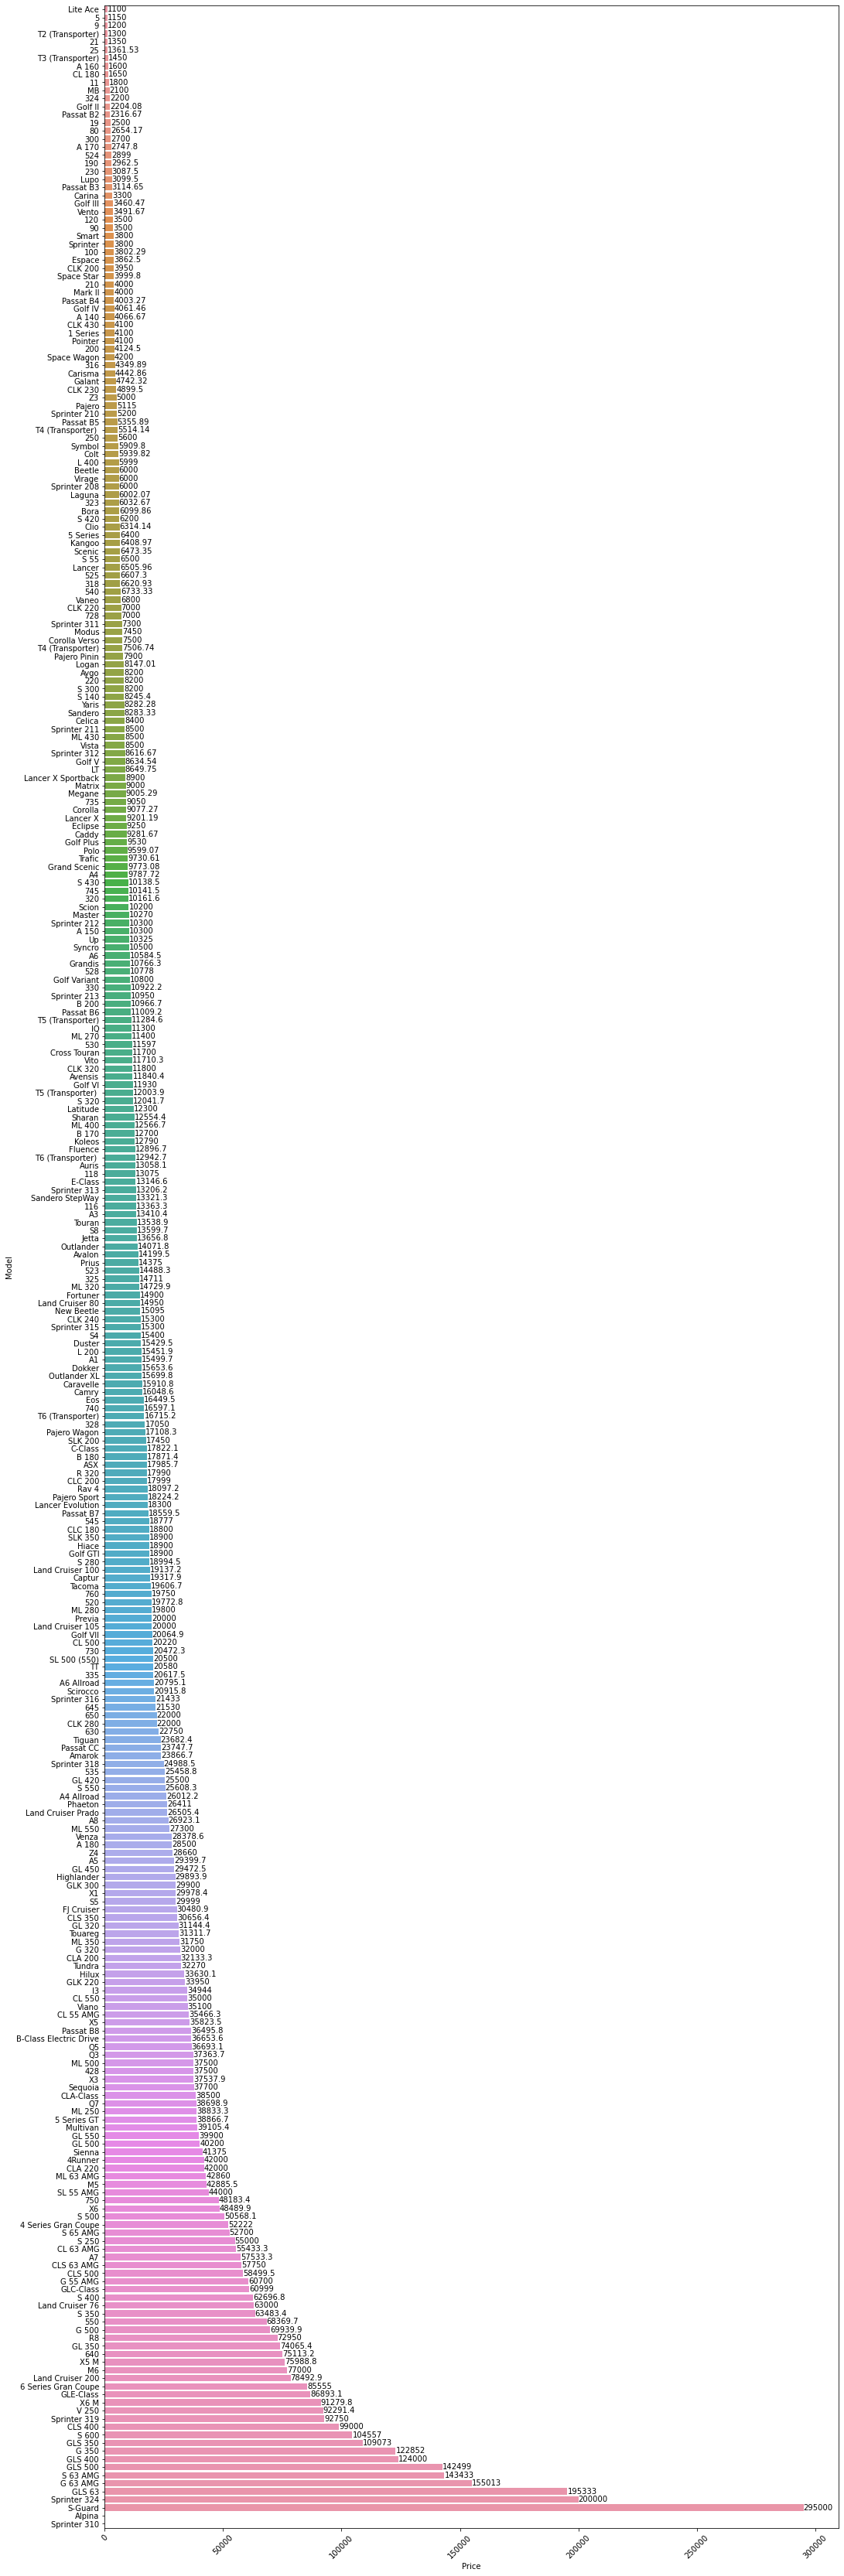

In [22]:
plt.figure(figsize=(17,60))
ax = sns.barplot(y = tmp.Model,x = tmp.Price)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

# Model Building 

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 
from sklearn.base import clone
from xgboost import XGBRFRegressor,XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [38]:
def Model_build(data,model):
    X = data[data.columns[data.columns != "Price"]]
    y = data.Price
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    print('Doing Model Train on whole data')
    model.fit(X_train.values,y_train.values)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train.values)
    model.score(X_train,y_train),model.score(X_test,y_test)
    print('MAE,RMSE and Rsquare for Test Data')
    print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred,squared=False), r2_score(y_test,y_pred))
    print('MAE,RMSE and Rsquare for Train Data')
    print(mean_absolute_error(y_pred_train,y_train), mean_squared_error(y_pred_train,y_train,squared=False),r2_score(y_pred_train,y_train))
    print("============="*5,"\n")
    #dict_score  ={'MAE':} 

# Model without Engine V

In [44]:
df = pd.read_csv("Train.csv")
df.columns =['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine_Type',
       'Registration', 'Year', 'Model']
df = df.drop('EngineV',axis =1)
df.dropna(inplace = True)
df = pd.get_dummies(df,columns=['Model','Brand','Body','Engine_Type','Registration'])

In [45]:
print("XG Boost Model")
model_xgb = XGBRegressor()
Model_build(df,model_xgb)
print("Random Forest Model")
model_random = RandomForestRegressor()
Model_build(df,model_random)
print("Linear regression")
model_lin = LinearRegression()
Model_build(df,model_lin)
print("KNN  regression")
model_knn = KNeighborsRegressor()
Model_build(df,model_knn)

XG Boost Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
4327.39475948786 18206.057214079992 0.6147193956015071
MAE,RMSE and Rsquare for Train Data
2254.7045690757063 3953.1553540294803 0.9723969237208896

Random Forest Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
4152.832527906094 18425.239394979286 0.6053867908048893
MAE,RMSE and Rsquare for Train Data
1357.4614428381608 3572.837702083043 0.9768843566714206

Linear regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
707888256177.2501 7301248524503.858 -6.196402251666687e+16
MAE,RMSE and Rsquare for Train Data
5703.785839574595 10648.477524688398 0.7683277848005146

KNN  regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
8415.467370059881 22113.896192901317 0.431571462367204
MAE,RMSE and Rsquare for Train Data
5986.028446974236 11523.603035150803 0.7200399044819528



# Model With Engine V

In [46]:
df = pd.read_csv("Train.csv")
df.columns =['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine_Type',
       'Registration', 'Year', 'Model']
df.dropna(inplace = True)
df = pd.get_dummies(df,columns=['Model','Brand','Body','Engine_Type','Registration'])

In [48]:
print("XG Boost Model")
model_xgb = XGBRegressor()
Model_build(df,model_xgb)
print("Random Forest Model")
model_random = RandomForestRegressor()
Model_build(df,model_random)
print("Linear regression")
model_lin = LinearRegression()
Model_build(df,model_lin)
print("KNN  regression")
model_knn = KNeighborsRegressor()
Model_build(df,model_knn)

XG Boost Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2781.0399918004387 6531.833106003097 0.9362062637640576
MAE,RMSE and Rsquare for Train Data
1734.327799722802 3282.3460310919545 0.9832306424762389

Random Forest Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2624.4045481003254 5296.551388169653 0.9580536419428732
MAE,RMSE and Rsquare for Train Data
1260.1491071418254 4164.359165300804 0.9710377819785714

Linear regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
91792907933.82811 927098728472.8732 -1285167842455307.8
MAE,RMSE and Rsquare for Train Data
6017.503310316382 12570.421784095222 0.6887046977190496

KNN  regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
5507.007500621119 10648.783574200637 0.8304460622915748
MAE,RMSE and Rsquare for Train Data
4833.89840621118 10807.071043871918 0.76136550429448



# Megrging Hatch and vagon under Body

In [49]:
df = pd.read_csv("Train.csv")
df.columns =['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine_Type',
       'Registration', 'Year', 'Model']

In [50]:
df.loc[df.Body == 'hatch','Body'] = 'vagon'

In [51]:
df.dropna(inplace = True)
df = pd.get_dummies(df,columns=['Model','Brand','Body','Engine_Type','Registration'])

In [52]:
print("XG Boost Model")
model_xgb = XGBRegressor()
Model_build(df,model_xgb)
print("Random Forest Model")
model_random = RandomForestRegressor()
Model_build(df,model_random)
print("Linear regression")
model_lin = LinearRegression()
Model_build(df,model_lin)
print("KNN  regression")
model_knn = KNeighborsRegressor()
Model_build(df,model_knn)

XG Boost Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2766.0265182671874 6606.017454281774 0.9347489788050558
MAE,RMSE and Rsquare for Train Data
1738.4557928868644 3310.189167252057 0.9829493838342165

Random Forest Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2681.5742988541524 5434.007259145182 0.9558482107858022
MAE,RMSE and Rsquare for Train Data
1260.4935377677011 3949.793166619192 0.9738669540954636

Linear regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
221027699762.30035 2024383932737.8186 -6127645645685682.0
MAE,RMSE and Rsquare for Train Data
6019.882385481366 12577.558171305054 0.688240751452919

KNN  regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
5519.187783850932 10677.29768552876 0.8295368217755371
MAE,RMSE and Rsquare for Train Data
4818.506219254658 10802.034680002007 0.7616114517038497



# Merging Toyota and BMW

In [53]:
df = pd.read_csv("Train.csv")
df.columns =['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine_Type',
       'Registration', 'Year', 'Model']

In [54]:
df.loc[df.Brand == 'Toyota','Brand'] = 'BMW'
df.loc[df.Body == 'hatch','Body'] = 'vagon'

In [55]:
df.dropna(inplace = True)
df = pd.get_dummies(df,columns=['Model','Brand','Body','Engine_Type','Registration'])

In [56]:
print("XG Boost Model")
model_xgb = XGBRegressor()
Model_build(df,model_xgb)
print("Random Forest Model")
model_random = RandomForestRegressor()
Model_build(df,model_random)
print("Linear regression")
model_lin = LinearRegression()
Model_build(df,model_lin)
print("KNN  regression")
model_knn = KNeighborsRegressor()
Model_build(df,model_knn)

XG Boost Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2801.685785953119 5961.064286130245 0.9468680824463465
MAE,RMSE and Rsquare for Train Data
1765.0997846111036 3482.8541204775993 0.9810025252571808

Random Forest Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2654.360310712083 5311.502977676853 0.9578164876551377
MAE,RMSE and Rsquare for Train Data
1266.785148287262 4001.63547428625 0.973455317755375

Linear regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
543868319380.5665 4655499745243.065 -3.2407124205859964e+16
MAE,RMSE and Rsquare for Train Data
6019.88924689441 12577.558284705783 0.6882399240708825

KNN  regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
5573.285147826086 10660.44858204309 0.8300743895465461
MAE,RMSE and Rsquare for Train Data
4873.754796273292 10720.557979983112 0.7642282393374776



# Date Feature

In [57]:
df = pd.read_csv("Train.csv")
df.columns =['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine_Type',
       'Registration', 'Year', 'Model']

In [58]:
df.loc[df.Brand == 'Toyota','Brand'] = 'BMW'
df.loc[df.Body == 'hatch','Body'] = 'vagon'

In [59]:
df.dropna(inplace = True)
df= df[df.Year >1997]
df = pd.get_dummies(df,columns=['Model','Brand','Body','Engine_Type','Registration'])

In [60]:
print("XG Boost Model")
model_xgb = XGBRegressor()
Model_build(df,model_xgb)
print("Random Forest Model")
model_random = RandomForestRegressor()
Model_build(df,model_random)
print("Linear regression")
model_lin = LinearRegression()
Model_build(df,model_lin)
print("KNN  regression")
model_knn = KNeighborsRegressor()
Model_build(df,model_knn)

XG Boost Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
3502.919660620016 10202.03828939278 0.8492588802433326
MAE,RMSE and Rsquare for Train Data
1834.8082199312473 3395.34645808669 0.9834096357186303

Random Forest Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
3269.92995026094 9823.830931762172 0.8602281871527777
MAE,RMSE and Rsquare for Train Data
1342.8332546449246 4097.932992452224 0.9743286948340845

Linear regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
318250100746.61176 2068492872852.8696 -6196777409409406.0
MAE,RMSE and Rsquare for Train Data
6195.3660350953205 12205.74698388446 0.7379645066169009

KNN  regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
6784.125695290859 14208.3376951826 0.7076222094143345
MAE,RMSE and Rsquare for Train Data
5101.825813518198 10601.146955820748 0.7851802319622103



In [ ]:
np.sort(df.Year.unique())

In [61]:
for i in np.sort(df.Year.unique()):
    tmp = df[df.Year ==i]
    print("XG Boost Model")
    model_xgb = XGBRegressor()
    Model_build(df,model_xgb)
    print("Random Forest Model")
    model_random = RandomForestRegressor()
    Model_build(df,model_random)
    print("Linear regression")
    model_lin = LinearRegression()
    Model_build(df,model_lin)
    print("KNN  regression")
    model_knn = KNeighborsRegressor()
    Model_build(df,model_knn)
    print("-------------------------------------------------")

XG Boost Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
3502.919660620016 10202.03828939278 0.8492588802433326
MAE,RMSE and Rsquare for Train Data
1834.8082199312473 3395.34645808669 0.9834096357186303

Random Forest Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
3315.1618711895158 10235.1037030406 0.8482801748960752
MAE,RMSE and Rsquare for Train Data
1340.921485667292 4139.403793130183 0.9736518263579822

Linear regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
318250100746.61176 2068492872852.8696 -6196777409409406.0
MAE,RMSE and Rsquare for Train Data
6195.3660350953205 12205.74698388446 0.7379645066169009

KNN  regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
6784.125695290859 14208.3376951826 0.7076222094143345
MAE,RMSE and Rsquare for Train Data
5101.825813518198 10601.146955820748 0.7851802319622103

-------------------------------------------------
XG Boost Model
Doing 

# Removing outlier and feature selection approach:

Approach :

 Outlier removal and below options : 
 
    1- Remove EngineV and remove outlier(Price and Mileage) =====>>  MAE ~2400, RMSE ~4000
    
    2- Remove outliers, rmove EngineV and merger Toyota and BMW =====>>  MAE ~2400, RMSE ~4100
    
    3- Remove Engine ,merge Hatch and Vagon   =======>> MAE 2400, RMSE 4100
    
    4- Remove Engine ,Merger both           ========>> MAE 2400, RMSE 4200
    
    5- Add Engine V and merger Brand and Body both   ====>> MAE 2100 RMSE 3500
    
    6- Add Engine V and merger Body only            ====>> MAE 2100, RMSE 3400

## 1- Remove EngineV and remove outlier(Price and Mileage)

In [62]:
df = pd.read_csv('Train.csv')
df.columns =['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine_Type',
       'Registration', 'Year', 'Model']
df.dropna(inplace = True)

In [63]:
df = df.drop('EngineV',axis =1)

df =df[df.Price < 64820]
df =df.reset_index().drop('index',axis=1)

df = df[df.Mileage <450]
df =df.reset_index()
df =df.drop('index',axis =1)



In [64]:
df = pd.get_dummies(df,columns=['Model','Brand','Body','Engine_Type','Registration'])

In [65]:
print("XG Boost Model")
model_xgb = XGBRegressor()
Model_build(df,model_xgb)
print("Random Forest Model")
model_random = RandomForestRegressor()
Model_build(df,model_random)
print("Linear regression")
model_lin = LinearRegression()
Model_build(df,model_lin)
print("KNN  regression")
model_knn = KNeighborsRegressor()
Model_build(df,model_knn)

XG Boost Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2362.90265422811 4025.1179032831456 0.8822552188425504
MAE,RMSE and Rsquare for Train Data
1560.087696097583 2332.1542717803977 0.9610050668262425

Random Forest Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2426.3041882432885 4290.649644535551 0.8662078720238594
MAE,RMSE and Rsquare for Train Data
893.5565858550377 1603.3793467200371 0.9816054305831441

Linear regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
224749037592.4544 2447288487568.7954 -4.352660446180851e+16
MAE,RMSE and Rsquare for Train Data
3399.892017851254 4954.971930557042 0.8069799538647967

KNN  regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
5591.512656992085 8052.5218966575985 0.5287533419424673
MAE,RMSE and Rsquare for Train Data
4318.204178100264 6580.261430036488 0.5585949515293859



## 2- Remove EngineV,merger Toyota and BMW together

In [66]:
df = pd.read_csv('Train.csv')
df.columns =['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine_Type',
       'Registration', 'Year', 'Model']
df.dropna(inplace = True)

In [67]:
df = df.drop('EngineV',axis =1)
df.loc[df.Brand == 'Toyota','Brand'] = 'BMW'

df =df[df.Price < 64820]
df =df.reset_index().drop('index',axis=1)

df = df[df.Mileage <450]
df =df.reset_index()
df =df.drop('index',axis =1)

In [68]:
df = pd.get_dummies(df,columns=['Model','Brand','Body','Engine_Type','Registration'])

In [69]:
print("XG Boost Model")
model_xgb = XGBRegressor()
Model_build(df,model_xgb)
print("Random Forest Model")
model_random = RandomForestRegressor()
Model_build(df,model_random)
print("Linear regression")
model_lin = LinearRegression()
Model_build(df,model_lin)
print("KNN  regression")
model_knn = KNeighborsRegressor()
Model_build(df,model_knn)

XG Boost Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2456.999378592056 4189.940221190479 0.8724148560006664
MAE,RMSE and Rsquare for Train Data
1550.0311032490993 2328.3204308562285 0.9608096029116606

Random Forest Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2480.092835423011 4476.2870275316645 0.8543802411769815
MAE,RMSE and Rsquare for Train Data
901.3181954285933 1610.2786891699798 0.9813022837242807

Linear regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
65525323938.56887 900405896503.8369 -5891977982502499.0
MAE,RMSE and Rsquare for Train Data
3399.893029147428 4954.972337301545 0.8069798574462501

KNN  regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
5630.024145118732 8083.30482625032 0.5251435212928198
MAE,RMSE and Rsquare for Train Data
4319.835731530344 6556.7924572662805 0.564015086966855



## 3- Remove Engine ,merge Hatch and Vagon

In [70]:
df = pd.read_csv('Train.csv')
df.columns =['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine_Type',
       'Registration', 'Year', 'Model']
df.dropna(inplace = True)
df = df.drop('EngineV',axis =1)

In [71]:
df.loc[df.Body == 'hatch','Body'] = 'vagon'

In [72]:
df =df[df.Price < 64820]
df =df.reset_index().drop('index',axis=1)

df = df[df.Mileage <450]
df =df.reset_index()
df =df.drop('index',axis =1)

In [73]:
df = pd.get_dummies(df,columns=['Model','Brand','Body','Engine_Type','Registration'])

In [74]:
print("XG Boost Model")
model_xgb = XGBRegressor()
Model_build(df,model_xgb)
print("Random Forest Model")
model_random = RandomForestRegressor()
Model_build(df,model_random)
print("Linear regression")
model_lin = LinearRegression()
Model_build(df,model_lin)
print("KNN  regression")
model_knn = KNeighborsRegressor()
Model_build(df,model_knn)

XG Boost Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2429.024938091188 4095.420173672894 0.8781062649149777
MAE,RMSE and Rsquare for Train Data
1539.5468826825386 2282.2416202512704 0.9627362130097948

Random Forest Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2448.543702216873 4297.284012600732 0.8657938030432759
MAE,RMSE and Rsquare for Train Data
901.1249717010878 1613.5994028302302 0.981300002326608

Linear regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
1700427610332.0713 18354802872347.19 -2.4484086417013504e+18
MAE,RMSE and Rsquare for Train Data
3402.03432800132 4967.861136340067 0.8057793659932388

KNN  regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
5559.76916358839 8067.660549435079 0.526979799298678
MAE,RMSE and Rsquare for Train Data
4301.016054749341 6567.627978221776 0.5582245799718302



## 4 Remove Engine ,Merger both

In [75]:
df = pd.read_csv('Train.csv')
df.columns =['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine_Type',
       'Registration', 'Year', 'Model']
df.dropna(inplace = True)
df = df.drop('EngineV',axis =1)

In [76]:
df.loc[df.Brand == 'Toyota','Brand'] = 'BMW'
df.loc[df.Body == 'hatch','Body'] = 'vagon'

df =df[df.Price < 64820]
df =df.reset_index().drop('index',axis=1)

df = df[df.Mileage <450]
df =df.reset_index()
df =df.drop('index',axis =1)

In [77]:
df = pd.get_dummies(df,columns=['Model','Brand','Body','Engine_Type','Registration'])

In [78]:
print("XG Boost Model")
model_xgb = XGBRegressor()
Model_build(df,model_xgb)
print("Random Forest Model")
model_random = RandomForestRegressor()
Model_build(df,model_random)
print("Linear regression")
model_lin = LinearRegression()
Model_build(df,model_lin)
print("KNN  regression")
model_knn = KNeighborsRegressor()
Model_build(df,model_knn)

XG Boost Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2489.60764962531 4202.371397261219 0.8716566656139423
MAE,RMSE and Rsquare for Train Data
1580.69388990216 2367.8962509515677 0.959320401875112

Random Forest Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2538.6663484503915 4518.050407953898 0.8516503252307923
MAE,RMSE and Rsquare for Train Data
920.5491038064873 1637.5709002661001 0.9806393089945329

Linear regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
145815992485.68195 1409616944245.803 -1.4440647853151932e+16
MAE,RMSE and Rsquare for Train Data
3402.0148186015836 4967.861647778698 0.8057784723324537

KNN  regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
5603.832102902375 8105.602560052772 0.5225201321344051
MAE,RMSE and Rsquare for Train Data
4305.398713060686 6550.967578931253 0.5645662651470063



## 5- Add Engine V and merger Brand and Body both

In [79]:
df = pd.read_csv('Train.csv')
df.columns =['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine_Type',
       'Registration', 'Year', 'Model']
df.dropna(inplace = True)

In [80]:
df.loc[df.Brand == 'Toyota','Brand'] = 'BMW'
df.loc[df.Body == 'hatch','Body'] = 'vagon'

df =df[df.Price < 64820]
df =df.reset_index().drop('index',axis=1)

df = df[df.Mileage <450]
df =df.reset_index()
df =df.drop('index',axis =1)

In [81]:
df = pd.get_dummies(df,columns=['Model','Brand','Body','Engine_Type','Registration'])

In [82]:
print("XG Boost Model")
model_xgb = XGBRegressor()
Model_build(df,model_xgb)
print("Random Forest Model")
model_random = RandomForestRegressor()
Model_build(df,model_random)
print("Linear regression")
model_lin = LinearRegression()
Model_build(df,model_lin)
print("KNN  regression")
model_knn = KNeighborsRegressor()
Model_build(df,model_knn)

XG Boost Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2132.588027044211 3539.8233252973155 0.9089358102470261
MAE,RMSE and Rsquare for Train Data
1275.847438342414 1854.0664911416281 0.9761904588840965

Random Forest Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2166.7417405692713 3789.004187448944 0.8956638937954793
MAE,RMSE and Rsquare for Train Data
807.0266879656939 1441.1142879890594 0.9853589838351451

Linear regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
45888411869.79349 799080852576.0853 -4640512032205874.0
MAE,RMSE and Rsquare for Train Data
3403.5478607354885 4967.021067906779 0.8058579670821895

KNN  regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
4695.427200527704 6935.9983902795875 0.6503750463466637
MAE,RMSE and Rsquare for Train Data
3545.250831794195 5540.7897096237975 0.7093956561170305



In [ ]:
## 6- Add Engine V and merger Body only

In [83]:
df = pd.read_csv('Train.csv')
df.columns =['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine_Type',
       'Registration', 'Year', 'Model']
df.dropna(inplace = True)

In [84]:
df.loc[df.Body == 'hatch','Body'] = 'vagon'

df =df[df.Price < 64820]
df =df.reset_index().drop('index',axis=1)

df = df[df.Mileage <450]
df =df.reset_index()
df =df.drop('index',axis =1)

In [85]:
df = pd.get_dummies(df,columns=['Model','Brand','Body','Engine_Type','Registration'])

In [86]:
print("XG Boost Model")
model_xgb = XGBRegressor()
Model_build(df,model_xgb)
print("Random Forest Model")
model_random = RandomForestRegressor()
Model_build(df,model_random)
print("Linear regression")
model_lin = LinearRegression()
Model_build(df,model_lin)
print("KNN  regression")
model_knn = KNeighborsRegressor()
Model_build(df,model_knn)

XG Boost Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2143.0536118318664 3496.377471777534 0.911157436571483
MAE,RMSE and Rsquare for Train Data
1228.5560009008725 1741.9109192014234 0.9791410048660248

Random Forest Model
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
2146.2396163652834 3700.2428518867832 0.9004949983787744
MAE,RMSE and Rsquare for Train Data
775.3774491942321 1343.6296195160626 0.9873464040178536

Linear regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
213215260578.27844 1832793816110.3003 -2.4412467390880496e+16
MAE,RMSE and Rsquare for Train Data
3403.6007239445917 4967.021528551162 0.8058562509301651

KNN  regression
Doing Model Train on whole data
MAE,RMSE and Rsquare for Test Data
4691.995419525066 6919.674554258225 0.6520187908041801
MAE,RMSE and Rsquare for Train Data
3524.7783924802106 5511.201415491176 0.7113735321965151

